# **Exercício: Aplicando Algorítimo XGBoost com Classificação**

## Bibliotecas

In [1]:
# Libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import xgboost as xgb

## Base de Dados

In [2]:
df = pd.read_csv('../Classificacao/census.csv')
df.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,inative-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
# informação
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1   workclass        32561 non-null  object
 2   final-weight     32561 non-null  int64 
 3   education        32561 non-null  object
 4   education-num    32561 non-null  int64 
 5   marital-status   32561 non-null  object
 6   occupation       32561 non-null  object
 7   relationship     32561 non-null  object
 8   race             32561 non-null  object
 9   sex              32561 non-null  object
 10  capital-gain     32561 non-null  int64 
 11  capital-loos     32561 non-null  int64 
 12  hour-per-week    32561 non-null  int64 
 13  inative-country  32561 non-null  object
 14  income           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
# Descrição 
df.describe()

,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


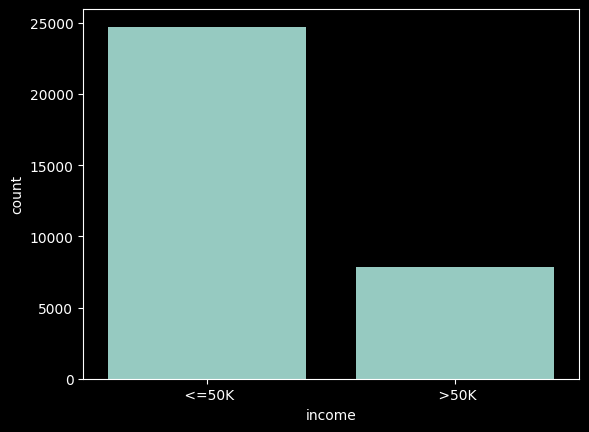

In [5]:
# Gráfico de renda
sns.countplot(x=df['income']);

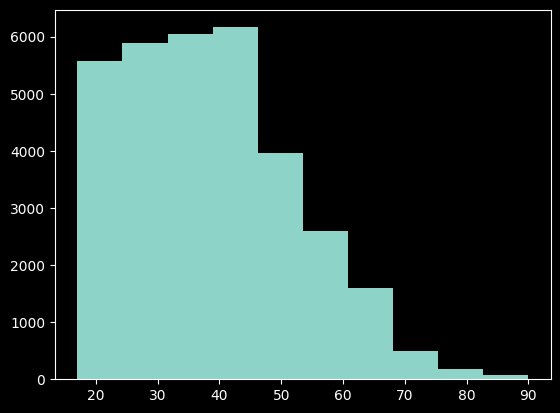

In [6]:
# Gráfico de idade
plt.hist(x=df['age']);

## Tratamento de dados

In [7]:
# Transformando os valores categóricos

# Crie uma instância do OneHotEncoder
onehotencoder = OneHotEncoder(categories='auto', sparse_output=False, dtype='int32')

# Aplique a codificação one-hot na coluna 'ocean_proximity'
ohe = onehotencoder.fit_transform(df[['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'inative-country']])

# Obtenha os nomes das categorias
categories = [f"{col}_{value}" for col, values in zip(['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'inative-country'], onehotencoder.categories_) for value in values]

# Crie o DataFrame resultante com as colunas codificadas
ohe_df = pd.DataFrame(ohe, columns=categories)
ohe_df

,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,...,inative-country_ Portugal,inative-country_ Puerto-Rico,inative-country_ Scotland,inative-country_ South,inative-country_ Taiwan,inative-country_ Thailand,inative-country_ Trinadad&Tobago,inative-country_ United-States,inative-country_ Vietnam,inative-country_ Yugoslavia
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32559,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [8]:
# Concatenando os dois data frame em um só
df = df.drop(columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'inative-country'])
df = pd.concat([df, ohe_df], axis=1)
df.head()

,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week,income,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,...,inative-country_ Portugal,inative-country_ Puerto-Rico,inative-country_ Scotland,inative-country_ South,inative-country_ Taiwan,inative-country_ Thailand,inative-country_ Trinadad&Tobago,inative-country_ United-States,inative-country_ Vietnam,inative-country_ Yugoslavia
0,39,77516,13,2174,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Valor de X
X = df.drop(columns=['income'])
X

,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,inative-country_ Portugal,inative-country_ Puerto-Rico,inative-country_ Scotland,inative-country_ South,inative-country_ Taiwan,inative-country_ Thailand,inative-country_ Trinadad&Tobago,inative-country_ United-States,inative-country_ Vietnam,inative-country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,40,154374,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,58,151910,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32559,22,201490,9,0,0,20,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [10]:
# Valor de Y
y = df['income']
y

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: income, Length: 32561, dtype: object

In [11]:
# Transformando os valores de y
catg, rotulos = pd.factorize(y)
y = catg
y

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [12]:
# Dividindo entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, test_size=0.3
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((22792, 108), (9769, 108), (22792,), (9769,))

## Criando o Classificador XGBoost

In [13]:
# Criando o objeto DMatrix (formato de dados otimizado para o XGBoost)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [14]:
# definindo os hiperparâmetros do modelo para classificação
params = {
    'objective': 'multi:softmax',  # Problema de classificação multiclasse
    'num_class': 2,  # Número de classes
    'max_depth': 3,  # Profundidade máxima da árvore
    'eta': 0.1,  # Taxa de aprendizado
}

In [15]:
# Treinando o modelo
num_round = 100
model = xgb.train(params, dtrain, num_round)


In [16]:
# Fazendo as previsões no conjunto de teste
y_pred = model.predict(dtest)

In [17]:
# Calculando a acurácia das previsões
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy}')

Acurácia: 0.8677449073600164


In [18]:
# Exibindo um relatório de classificação
class_report = classification_report(y_test, y_pred)
print('Relatório de Classificação:')
print(class_report)

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      7455
           1       0.79      0.60      0.68      2314

    accuracy                           0.87      9769
   macro avg       0.84      0.78      0.80      9769
weighted avg       0.86      0.87      0.86      9769



## Tuning dos Parâmetros

In [19]:
# Lib
from sklearn.model_selection import GridSearchCV

In [20]:
# Definindo o espaço de busca de hiperparâmetros
param_grid = {
    'booster': ['gbtree', 'gblinear', 'dart'],
}

In [21]:
# Criando um objeto XGBoost Classifier
xgb_tunado = xgb.XGBClassifier()

In [22]:
# Criando o objeto GridSearchCV
grid_search = GridSearchCV(estimator=xgb_tunado, param_grid=param_grid, cv=3, scoring='accuracy')

In [23]:
# Realizando a pesquisa em grade
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'booster': ['gbtree', 'gblinear', 'dart']},
             scoring='accuracy')

In [24]:
# O Melhor hiperparâmetros
best_params = grid_search.best_params_
print(f'O Melhor hiperparâmetros: {best_params}')

O Melhor hiperparâmetros: {'booster': 'gbtree'}


In [25]:
# Treinando o modelo com os melhores hiperparâmetros
best_model = xgb_tunado.set_params(**best_params)
best_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [26]:
# Fazendo as previsões no conjunto de teste
y_pred = best_model.predict(X_test)

In [27]:
# Avaliando o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia no conjunto de teste: {accuracy}')

Acurácia no conjunto de teste: 0.8709182106663937
